In [23]:
import pandas
from matplotlib import pyplot as plt

In [24]:
df = pandas.read_csv('pace_instances.csv', sep=',')
df.describe()

,num,n,m,solved,opt,upper,dels,adds,low_star,low_p3,...,after heavy non-edge,forbs heavy non-edge,time heavy non-edge,spend heavy non-edge,lower after heavy non-edge,after forced single merge,forbs forced single merge,time forced single merge,spend forced single merge,lower after forced single merge
count,49.00000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,61.959184,976.857143,0.959184,4.081667e+07,380.857143,277.448980,198.795918,376.959184,353.897959,...,61.877551,138.204082,0.938776,0.0,376.959184,23.673469,53.306122,7973.693878,224.285714,376.959184
std,14.28869,28.697386,777.749237,0.199915,1.999149e+08,313.401234,251.700224,662.341962,309.552901,284.236129,...,28.853533,518.091811,1.344869,0.0,309.552901,32.632032,246.901735,12994.172104,243.529516,309.327292
min,1.00000,10.000000,11.000000,0.000000,3.000000e+00,3.000000,0.000000,0.000000,3.000000,3.000000,...,6.000000,0.000000,0.000000,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,13.00000,40.000000,297.000000,1.000000,1.100000e+02,110.000000,70.000000,14.000000,110.000000,110.000000,...,40.000000,7.000000,0.000000,0.0,110.000000,0.000000,0.000000,428.000000,9.000000,110.000000
50%,25.00000,60.000000,821.000000,1.000000,2.980000e+02,298.000000,224.000000,42.000000,286.000000,285.000000,...,60.000000,22.000000,0.000000,0.0,286.000000,3.000000,0.000000,2108.000000,133.000000,286.000000
75%,37.00000,90.000000,1522.000000,1.000000,6.020000e+02,602.000000,408.000000,105.000000,602.000000,602.000000,...,90.000000,72.000000,2.000000,0.0,602.000000,40.000000,22.000000,10666.000000,329.000000,602.000000
max,49.00000,113.000000,3274.000000,1.000000,1.000000e+09,1085.000000,920.000000,3387.000000,1073.000000,984.000000,...,113.000000,3539.000000,6.000000,0.0,1073.000000,100.000000,1731.000000,66411.000000,851.000000,1074.000000


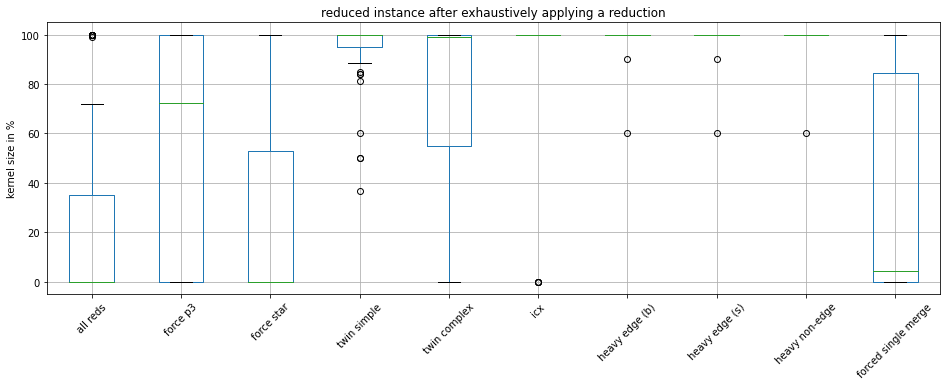

In [25]:
reds = ["all reds", "force p3", "force star", "twin simple", "twin complex", "icx", "heavy edge (b)", "heavy edge (s)", "heavy non-edge", "forced single merge"]

for r in reds:
    df[f'after% {r}'] = 100 * df[f'after {r}'] / df['n']
    
after_sizes = ['after% ' + r for r in reds]
df.describe()

plt.gcf().set_size_inches(16,5)
plt.gca().set_ylabel('kernel size in %')
plt.gca().set_title('reduced instance after exhaustively applying a reduction')
df.boxplot(after_sizes, rot=45)
plt.gca().set_xticklabels(reds)

plt.savefig('reductions.pdf', bbox_inches='tight')

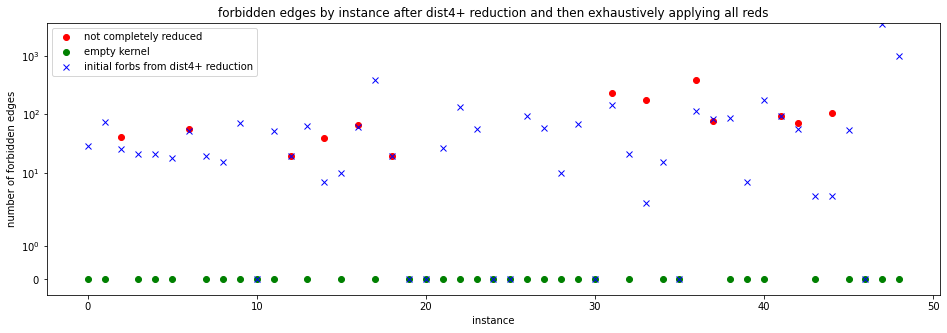

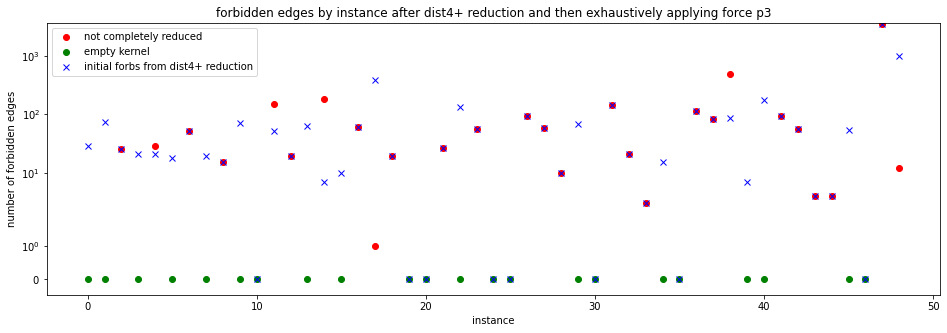

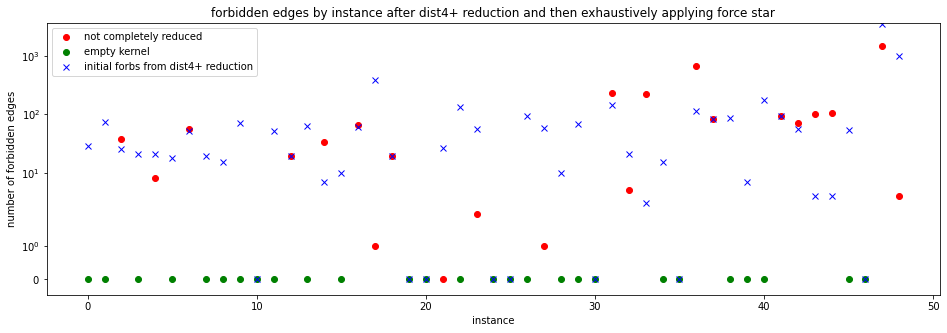

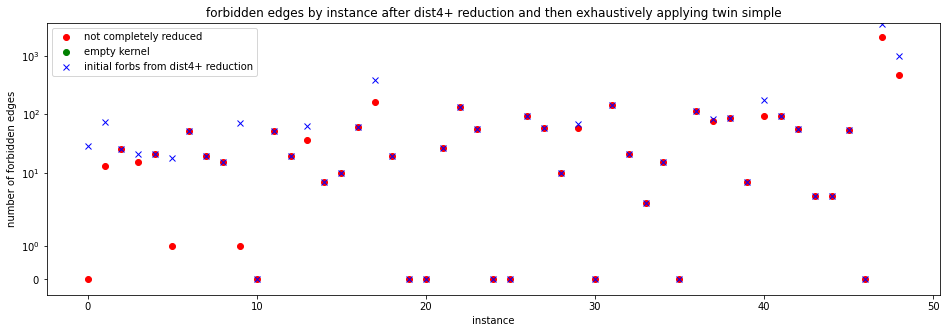

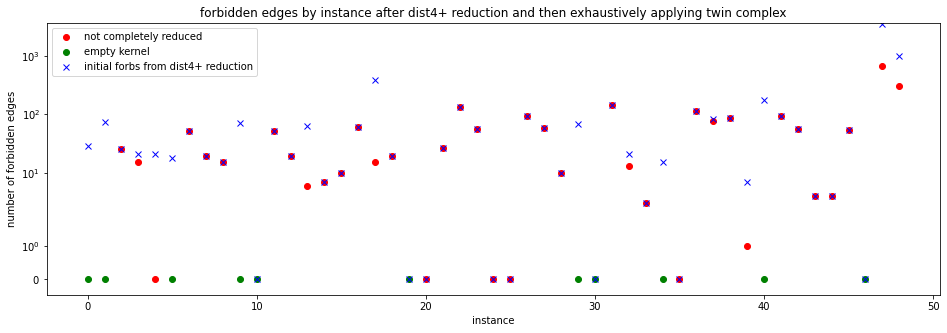

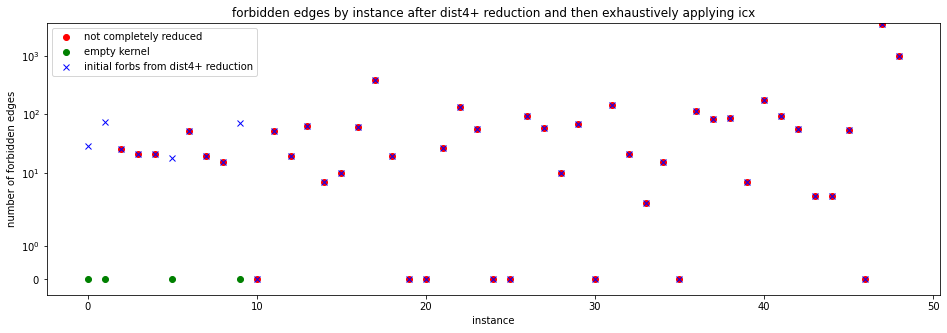

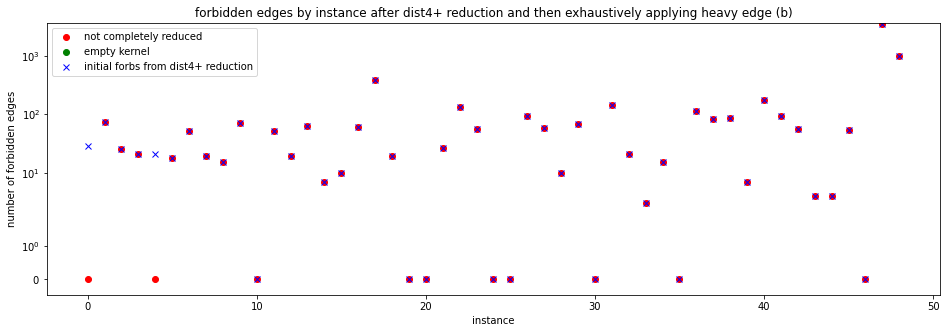

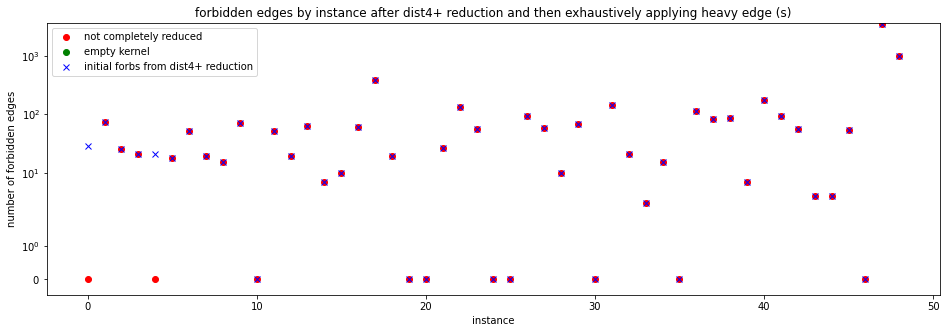

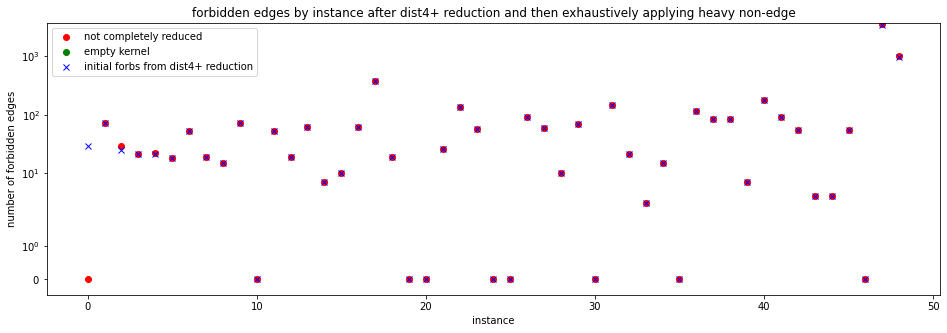

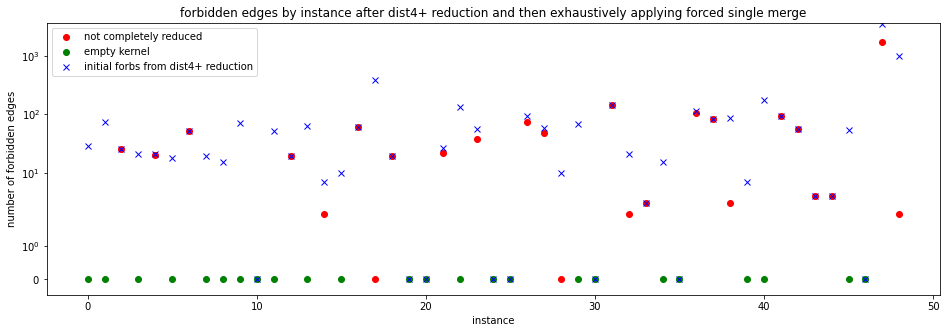

In [26]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'forbidden edges by instance after dist4+ reduction and then exhaustively applying {r}')
    df[df[f'after {r}']>0][f'forbs {r}'].plot(style='ro', label='not completely reduced')
    df[df[f'after {r}']==0][f'forbs {r}'].plot(style='go', label='empty kernel')
    df[f'dist4+'].plot(style='bx', label='initial forbs from dist4+ reduction')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('number of forbidden edges')
    plt.gca().set_yscale('symlog')
    plt.gca().set_ylim(bottom=-0.5)
    plt.legend()
    plt.show()

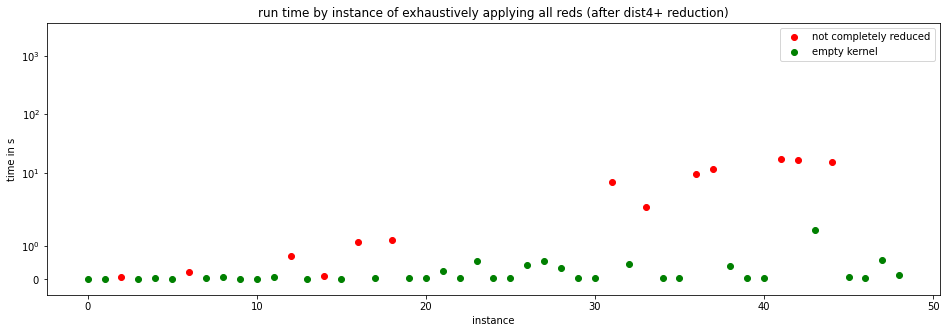

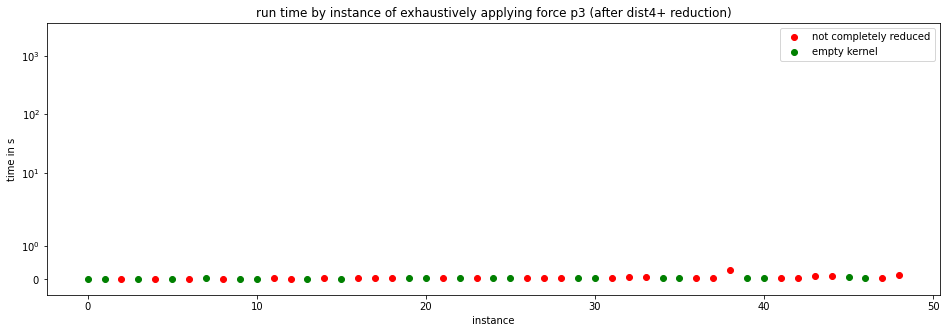

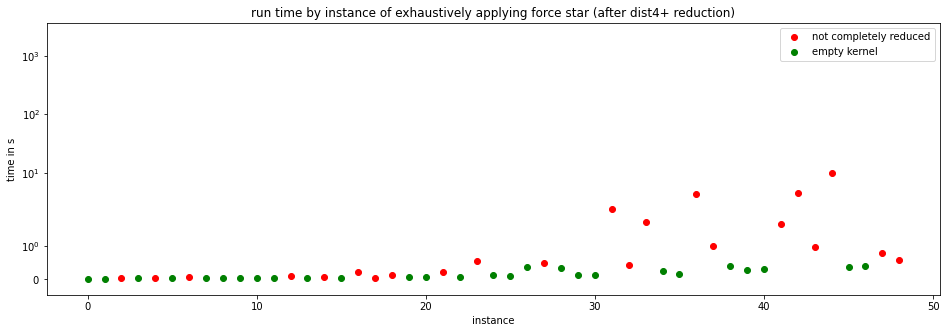

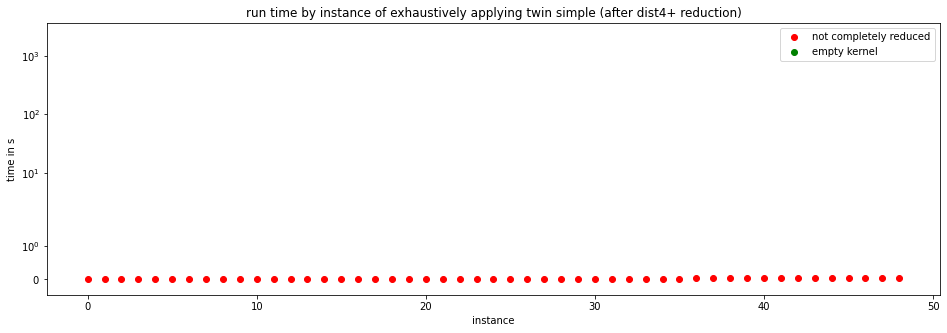

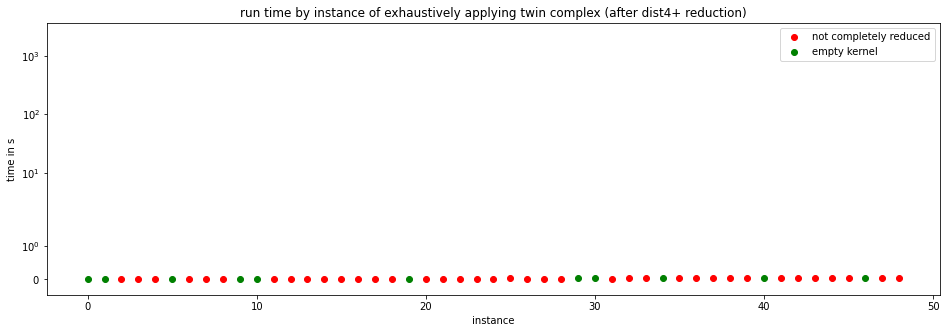

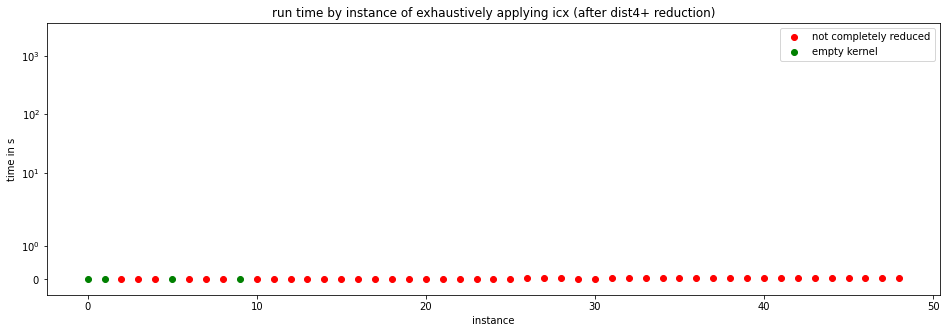

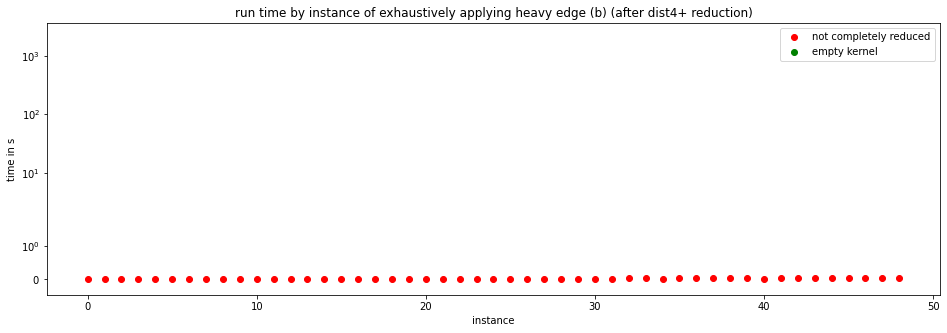

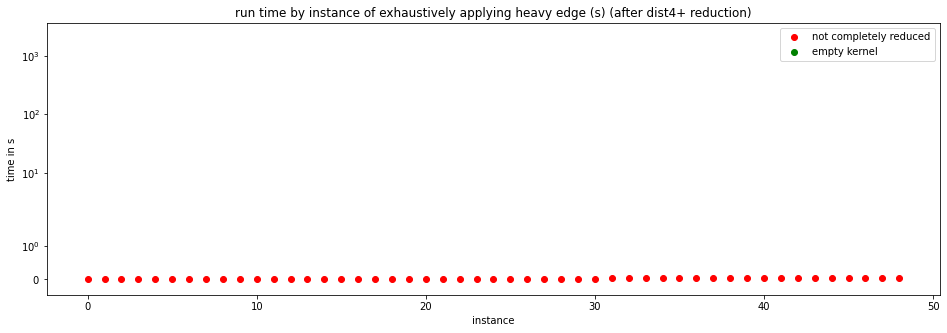

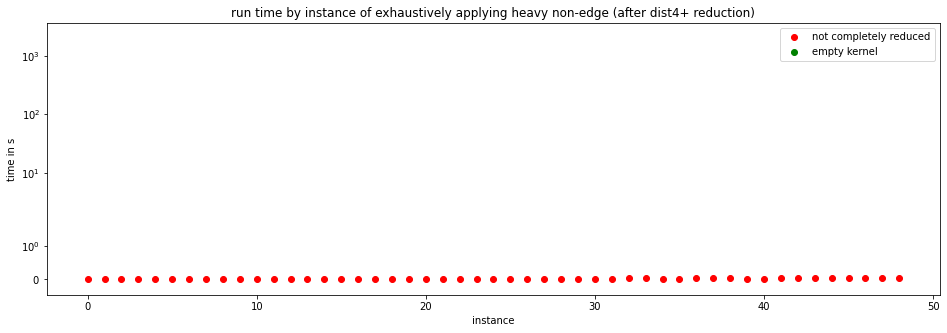

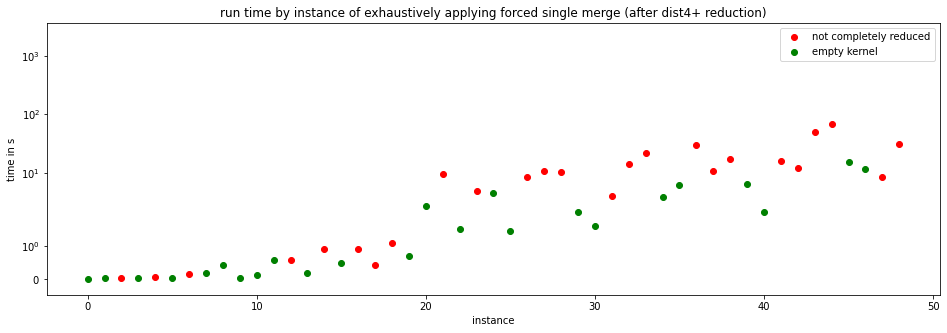

In [27]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'run time by instance of exhaustively applying {r} (after dist4+ reduction)')
    (df[df[f'after {r}']>0][f'time {r}'] / 1000).plot(style='ro', label='not completely reduced')
    (df[df[f'after {r}']==0][f'time {r}'] / 1000).plot(style='go', label='empty kernel')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('time in s')
    plt.gca().set_yscale('symlog')
    plt.gca().set_ylim(bottom=-0.5, top=60*60)
    plt.legend()
    plt.show()

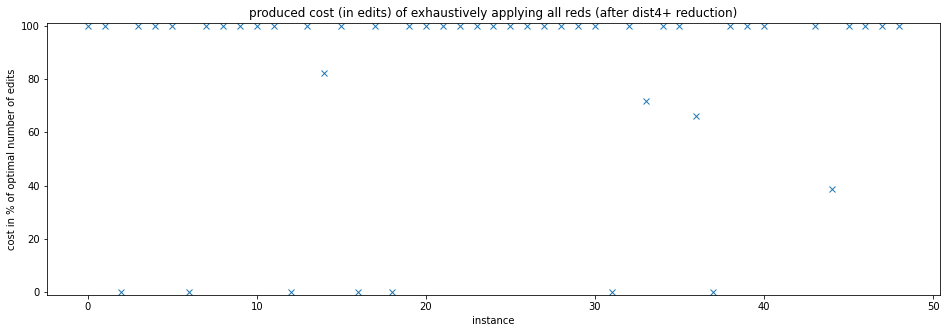

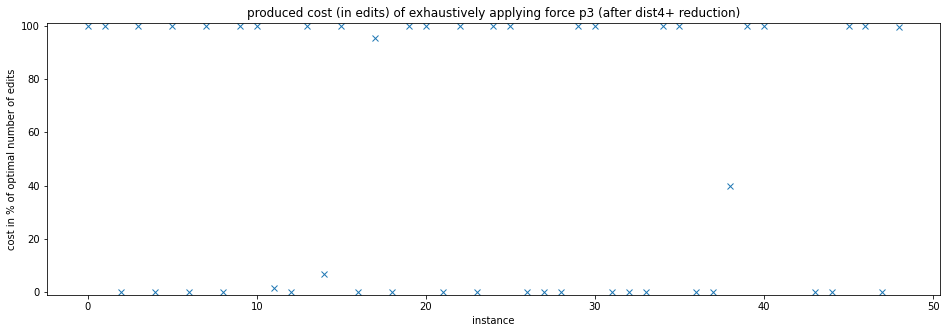

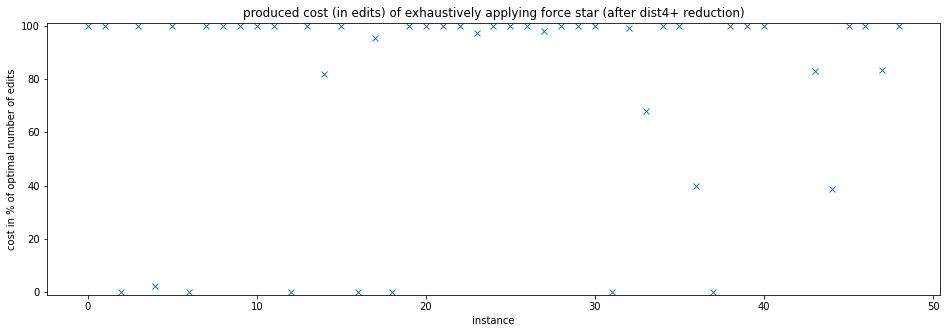

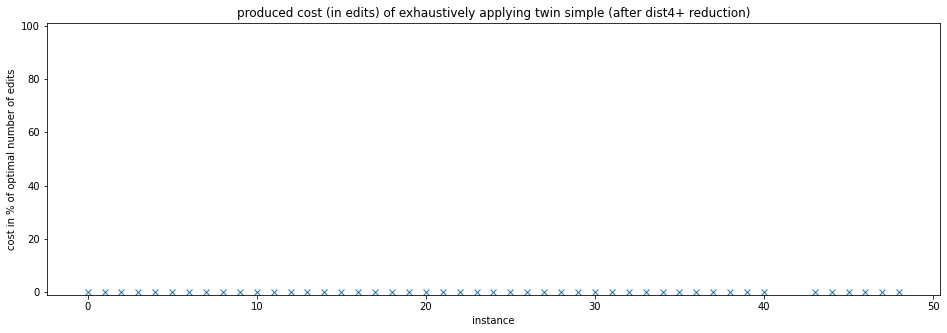

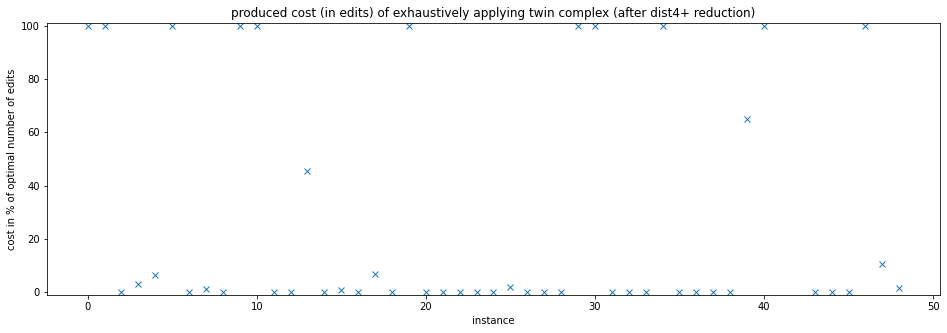

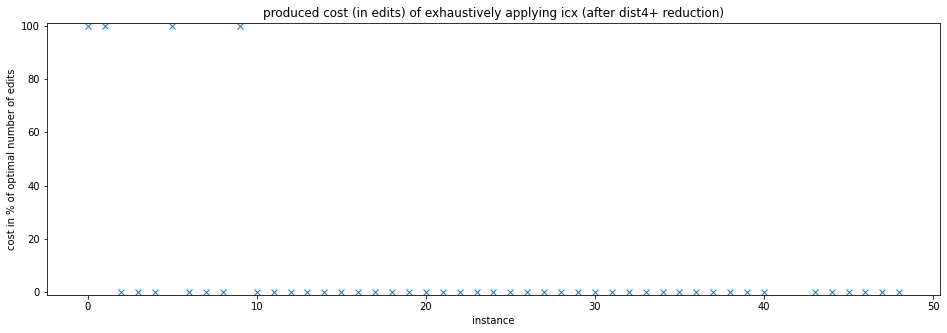

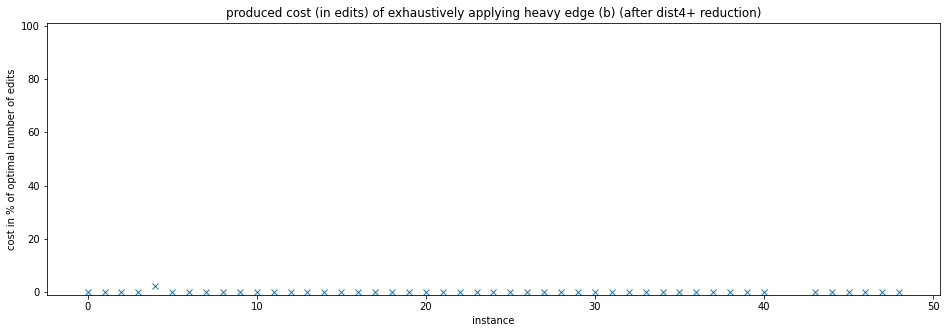

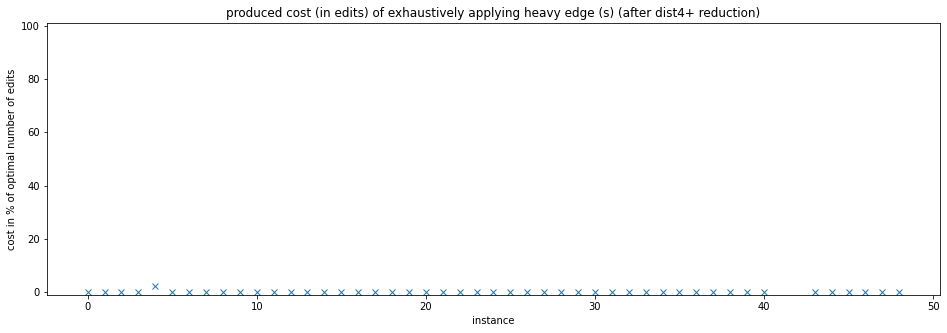

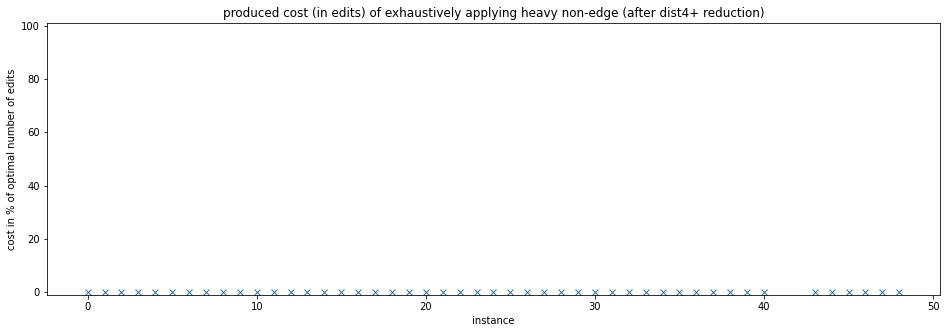

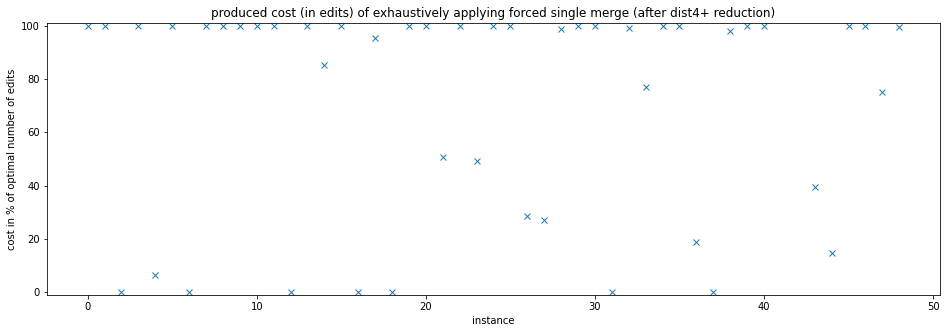

In [28]:
for r in reds:
    plt.gcf().set_size_inches(16,5)
    plt.gca().set_title(f'produced cost (in edits) of exhaustively applying {r} (after dist4+ reduction)')
    ds = df[df.solved==1]
    (ds[f'spend {r}'] / ds.opt * 100).plot(style='x')
    plt.gca().set_xlabel('instance')
    plt.gca().set_ylabel('cost in % of optimal number of edits')
    plt.gca().set_ylim(bottom=-1, top=101)
    plt.show()

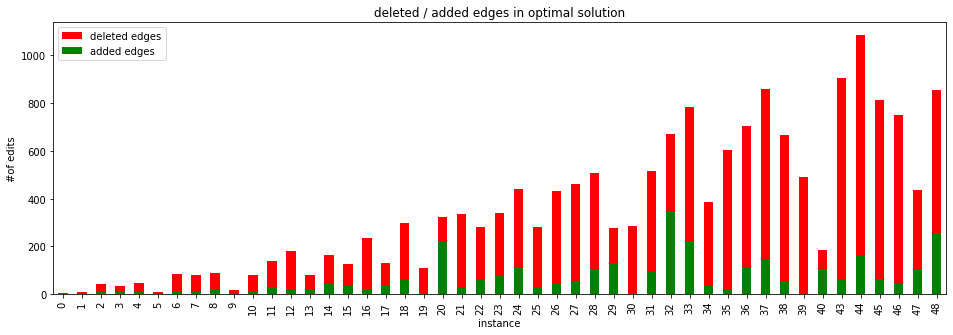

In [29]:
plt.gcf().set_size_inches(16,5)
plt.title(f'deleted / added edges in optimal solution')
ds = df[df.solved==1]
(ds.dels+ds.adds).plot.bar(color='r', label='deleted edges')
ds.adds.plot.bar(color='g', label='added edges')
plt.xlabel('instance')
plt.ylabel('#of edits')
plt.legend()
plt.show()

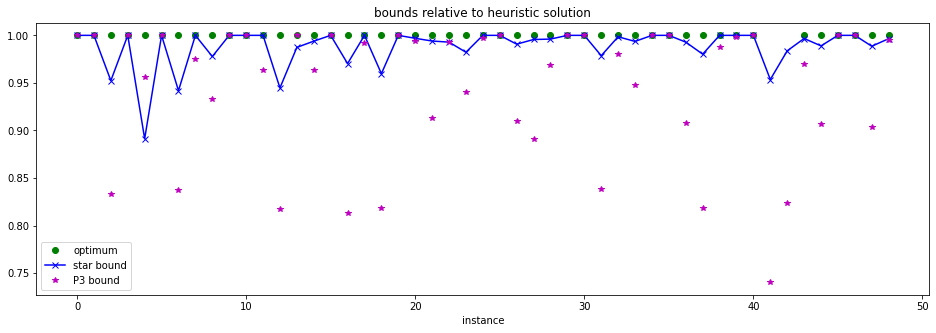

In [30]:
ax = plt.gca()
plt.gcf().set_size_inches(16,5)

solved = df.solved==True
low_rel = df.low_star/df.upper
opt_rel = df.opt/df.upper
p3_rel = df.low_p3/df.upper

ax.plot(opt_rel[solved], 'go', label='optimum')
ax.plot(low_rel, 'bx-', label='star bound')
ax.plot(p3_rel, 'm*', label='P3 bound')


ax.set_xlabel('instance')
ax.set_title('bounds relative to heuristic solution')
ax.legend()

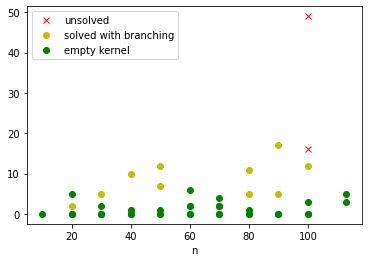

In [31]:
df['gap'] = df.upper - df.low_star
df[df.solved==0].plot(x='n', y='gap', style='rx', label='unsolved')
ds = df[df.solved==1]
ds[ds['after all reds']>0].plot(x='n', y='gap', style='yo', ax=plt.gca(), label='solved with branching')
ds[ds['after all reds']==0].plot(x='n', y='gap', style='go', ax=plt.gca(), label='empty kernel')
plt.show()

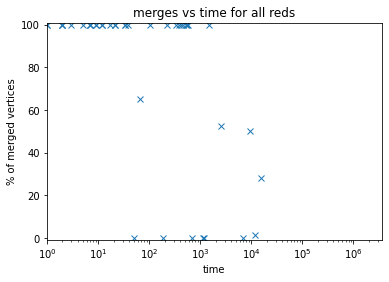

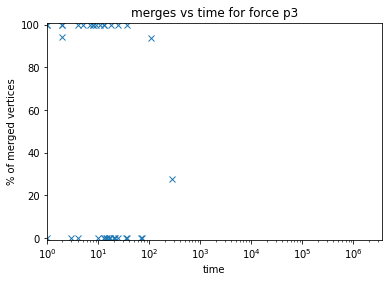

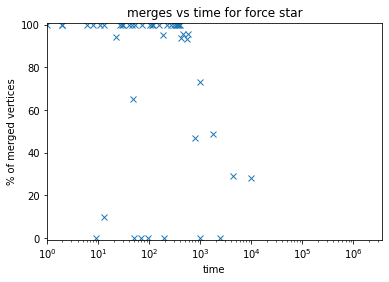

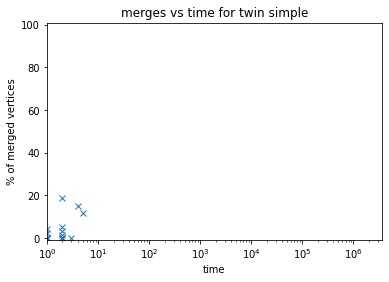

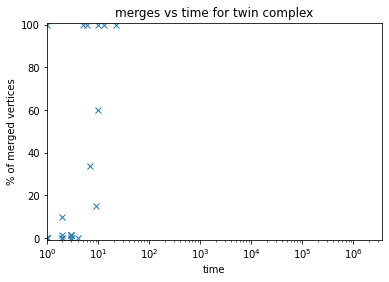

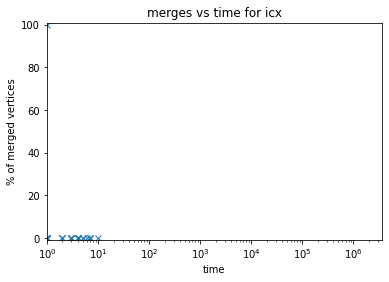

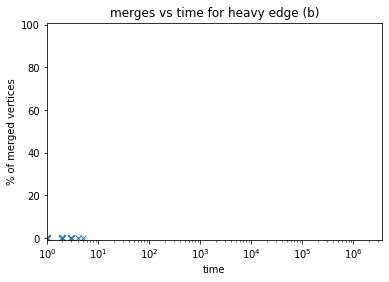

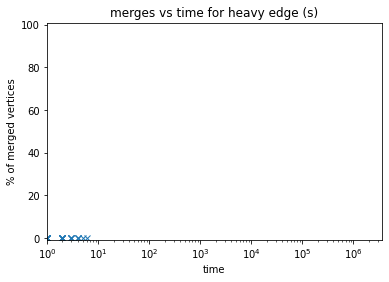

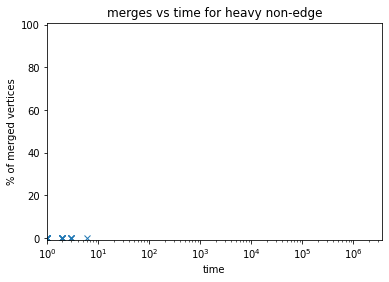

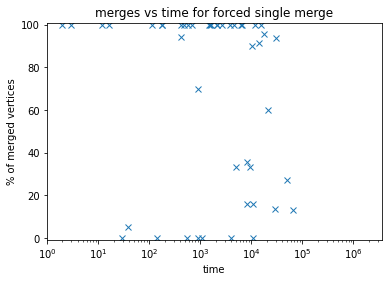

In [32]:
for r in reds:
    plt.title(f'merges vs time for {r}')
    ds = df[df.solved==1]
    merges = (ds.n - ds[f'after {r}']) / ds.n * 100
    plt.plot(ds[f'time {r}'], merges, 'x')
    plt.xlabel('time')
    plt.ylabel('% of merged vertices')
    plt.ylim(bottom=-1, top=101)
    plt.xlim(left=1,right=1000*60*60)
    plt.semilogx()
    plt.show()